# <center>  <font color='#F27F30'> Py</font><font color='##2E4DE8'>crostates</font>, a python library to study EEG microstates </center>
<br/><br/>
<center>Victor Férat [1], Mathieu Scheltienne [2], Denis Brunet [1,3] , Ros Tomas [1,3], Christoph M. Michel [1,3]<center>
<br/><br/>

1. Functional Brain Mapping Laboratory, Department of Basic Neurosciences, Campus Biotech, University of Geneva, Geneva, Switzerland

2. Human Neuroscience Platform, Fondation Campus Biotech Geneva, Geneva, Switzerland 

3. Centre for Biomedical Imaging (CIBM) Lausanne-Geneva, Geneva, Switzerland



In [35]:
import matplotlib
%matplotlib notebook

import mne
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon


raw_fname = lemon.load_data(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.crop(0, 30)

raw.pick('eeg')
raw.set_eeg_reference('average')

epochs = mne.make_fixed_length_epochs(raw, duration=2.0)
epochs.load_data()

Reading C:\Users\ferat\pycrostates_data\PREPROCESSED_LEMON\sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 15 events and 500 original time points ...
0 bad epochs dropped


C:\Users\ferat\AppData\Local\Temp\ipykernel_16628\442825568.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
C:\Users\ferat\AppData\Local\Temp\ipykernel_16628\442825568.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)


Number of events,15
Events,1: 15
Time range,0.000 – 1.996 sec
Baseline,off


## <center> The Modified <font color='#F27F30'>K</font>-means algortihm (ModKmeans) </center>

In [36]:
n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)

### Fitting

In [37]:
ModK.fit(raw, picks='eeg', tmin=None, tmax=None, reject_by_annotation=True, n_jobs=5, verbose=None)

100%|███████████████████████████████████████████████████████████████████████████|  : 100/100 [00:11<00:00,    8.53it/s]


[kmeans.fit] INFO: Selecting run with highest GEV = 67.83% after 100/100 iterations converged.


<IPython.core.display.Javascript object>


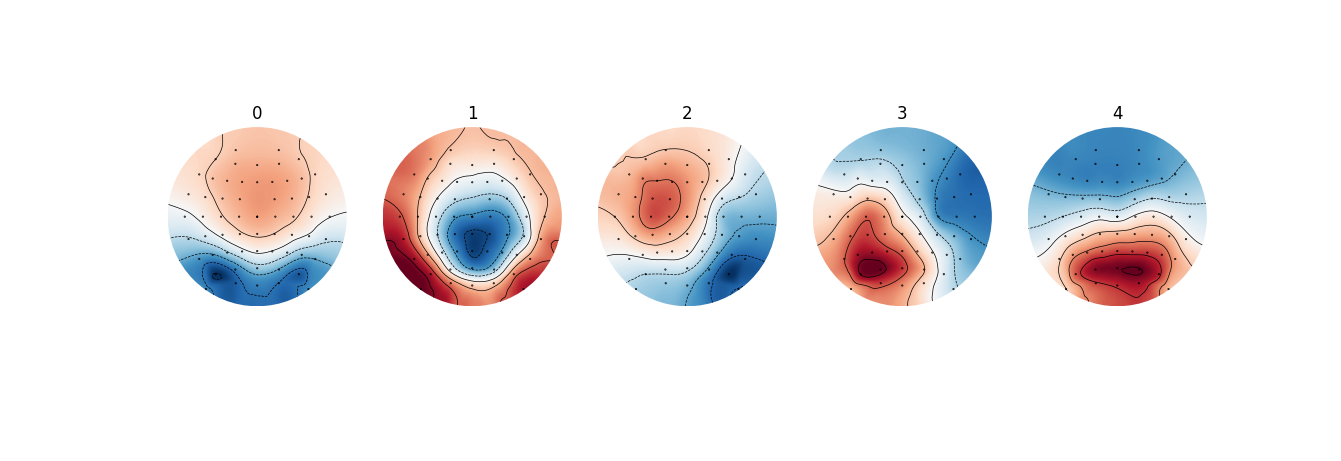

In [38]:
ModK.plot();

<IPython.core.display.Javascript object>


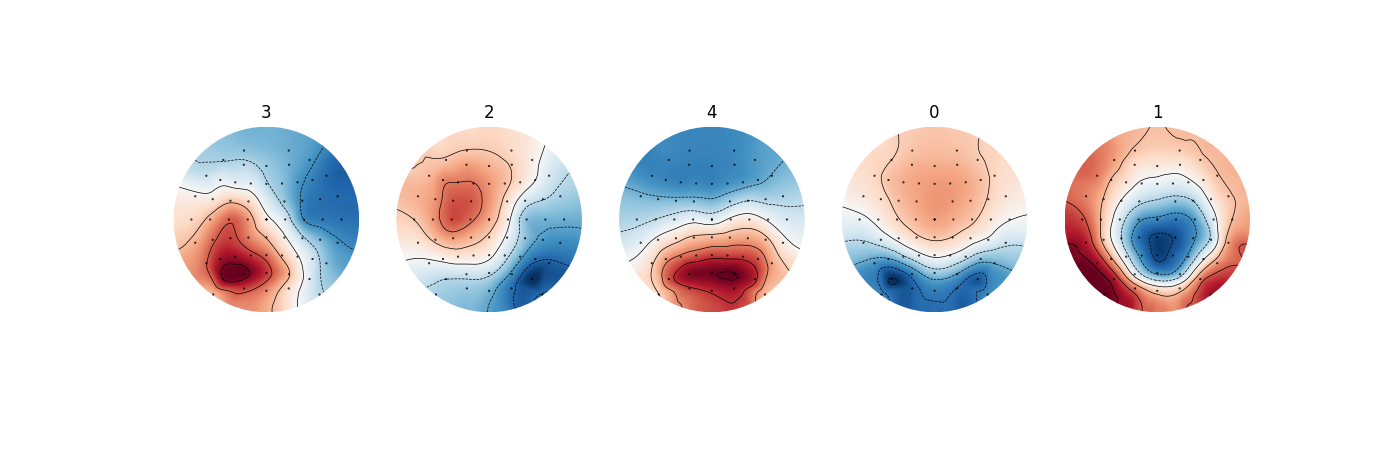

In [39]:
ModK.reorder_clusters(order=[3, 2, 4, 0, 1])
ModK.plot();

<IPython.core.display.Javascript object>


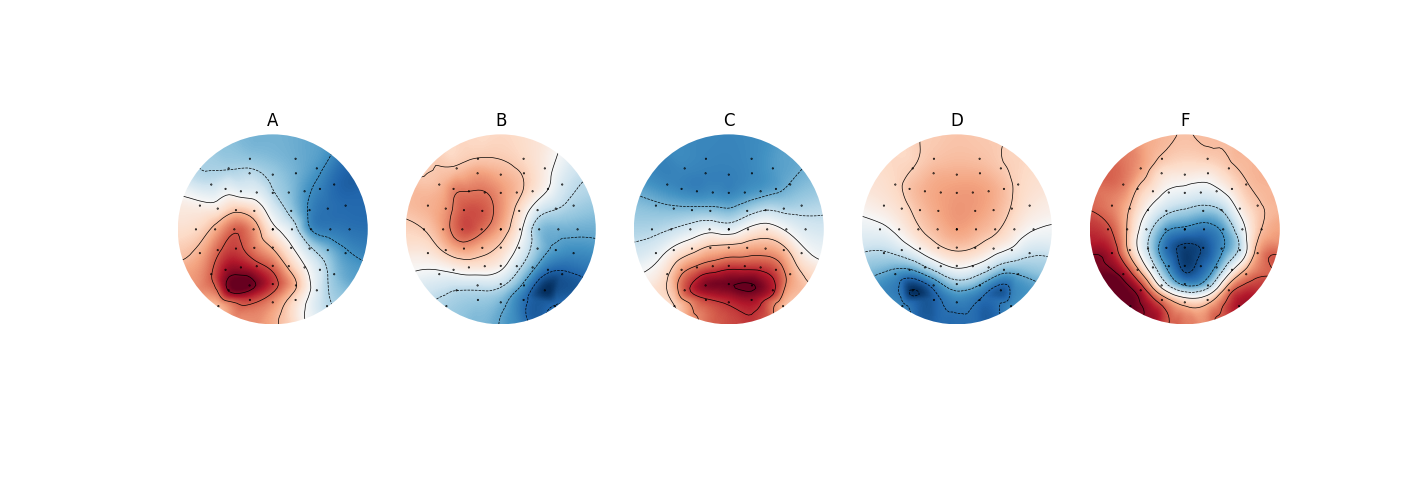

In [40]:
ModK.rename_clusters(new_names=['A', 'B', 'C', 'D', 'F'])
ModK.plot();

<IPython.core.display.Javascript object>


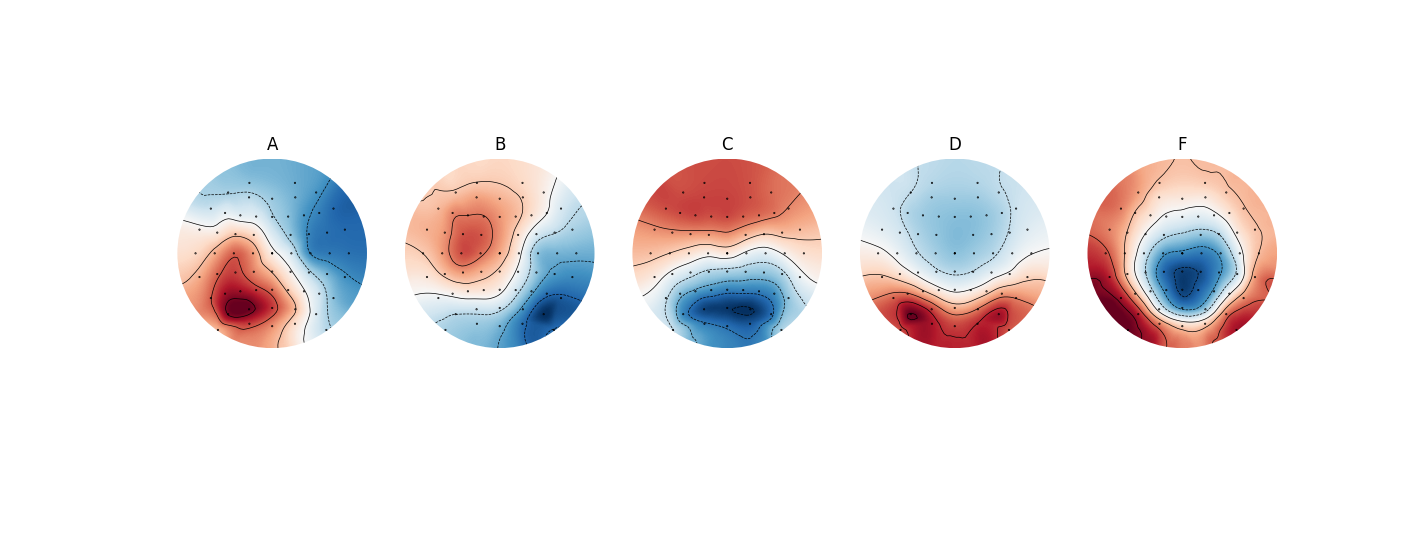

In [41]:
ModK.invert_polarity([False, False, True, True, False])
ModK.plot();

this also works with Epochs instances 

100%|███████████████████████████████████████████████████████████████████████████|  : 100/100 [00:11<00:00,    8.51it/s]


[kmeans.fit] INFO: Selecting run with highest GEV = 67.83% after 100/100 iterations converged.


<IPython.core.display.Javascript object>


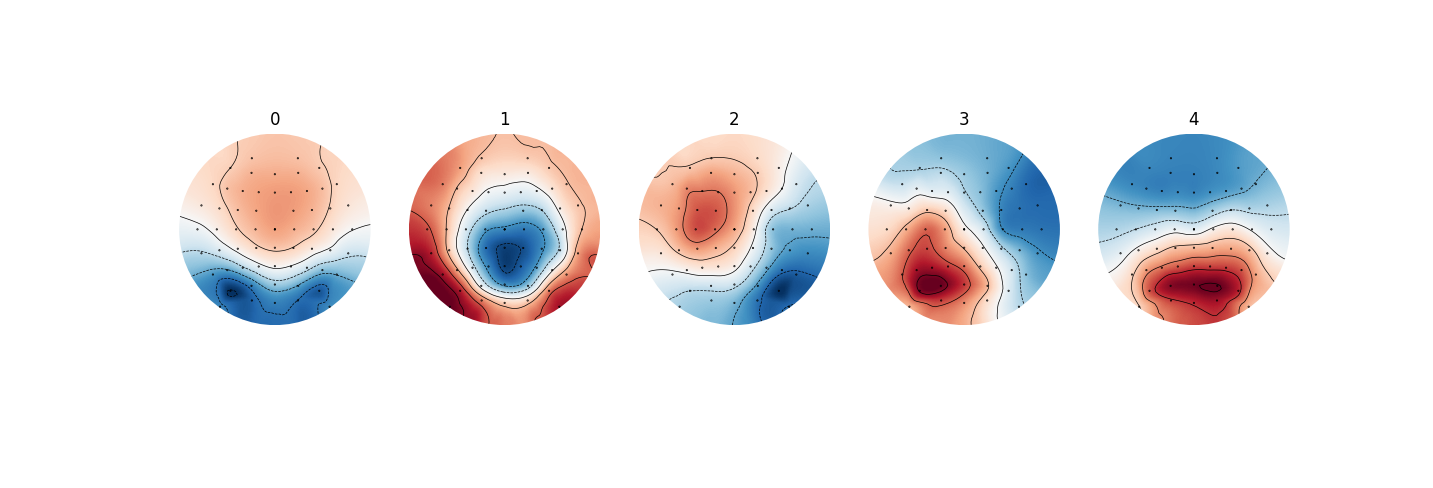

In [42]:
ModK_epochs = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK_epochs.fit(epochs, n_jobs=5)
ModK_epochs.plot();

### Prediction

#### Raw

[_base.predict] INFO: Segmenting data with factor 10 and effective smoothing window size: 0.0840 (ms).
[_base.predict] INFO: Rejecting segments shorter than 0.0200 (ms).
[_base.predict] INFO: Rejecting first and last segments.


<IPython.core.display.Javascript object>


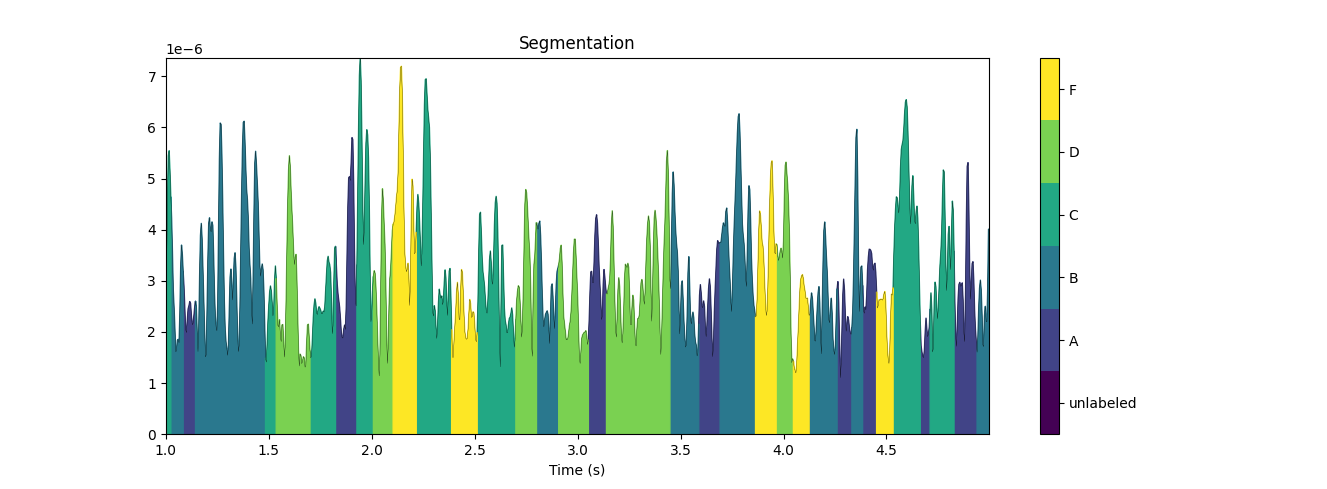

[segmentation._plot_segmentation] INFO: For visualization purposes, the last segment appears truncated by 1 sample. In the case where the last segment is 1 sample long, it does not appear.


In [43]:
segmentation = ModK.predict(raw, reject_by_annotation=True, factor=10,
                            half_window_size=10, min_segment_length=5,
                            reject_edges=True)
segmentation.plot(tmin=1, tmax=5);

#### Epochs

[_base.predict] INFO: Segmenting data with factor 10 and effective smoothing window size: 0.0840 (ms).
[_base.predict] INFO: Rejecting segments shorter than 0.0200 (ms).
[_base.predict] INFO: Rejecting first and last segments.


<IPython.core.display.Javascript object>


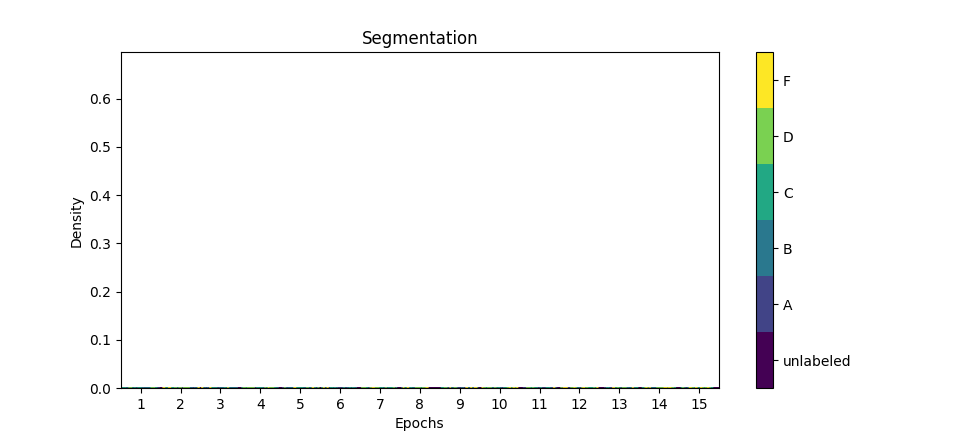

[segmentation._plot_segmentation] INFO: For visualization purposes, the last segment appears truncated by 1 sample. In the case where the last segment is 1 sample long, it does not appear.


In [44]:
segmentation = ModK.predict(epochs, reject_by_annotation=True, factor=10,
                            half_window_size=10, min_segment_length=5,
                            reject_edges=True)
segmentation.plot();

### Microstates Parameters

In [45]:
parameter_dict = segmentation.compute_parameters()
parameter_dict

{'A_mean_corr': 0.521922442826526,
 'A_gev': 0.04335460005389633,
 'A_occurrences': 1.5976871576384664,
 'A_timecov': 0.15672550213024955,
 'A_meandurs': 0.09809523809523808,
 'B_mean_corr': 0.5728880645562305,
 'B_gev': 0.08495224871342401,
 'B_occurrences': 1.8259281801582472,
 'B_timecov': 0.22763237979306147,
 'B_meandurs': 0.12466666666666666,
 'C_mean_corr': 0.640034665130885,
 'C_gev': 0.14110810834013893,
 'C_occurrences': 2.1682897139379183,
 'C_timecov': 0.2506086427267194,
 'C_meandurs': 0.11557894736842106,
 'D_mean_corr': 0.6571826541509467,
 'D_gev': 0.16335719952954586,
 'D_occurrences': 1.74984783931832,
 'D_timecov': 0.2344796104686549,
 'D_meandurs': 0.13399999999999998,
 'F_mean_corr': 0.5103578819573095,
 'F_gev': 0.034412820682736774,
 'F_occurrences': 1.4455264759586124,
 'F_timecov': 0.13055386488131468,
 'F_meandurs': 0.09031578947368424,
 'unlabeled': 0.12373333333333333}

In [46]:
import pandas as pd
pd.DataFrame([parameter_dict])

,A_mean_corr,A_gev,A_occurrences,A_timecov,A_meandurs,B_mean_corr,B_gev,B_occurrences,B_timecov,B_meandurs,...,D_gev,D_occurrences,D_timecov,D_meandurs,F_mean_corr,F_gev,F_occurrences,F_timecov,F_meandurs,unlabeled
0,0.521922,0.043355,1.597687,0.156726,0.098095,0.572888,0.084952,1.825928,0.227632,0.124667,...,0.163357,1.749848,0.23448,0.134,0.510358,0.034413,1.445526,0.130554,0.090316,0.123733


In [50]:
parameter_dict = segmentation.compute_parameters(return_dist=True)

<IPython.core.display.Javascript object>


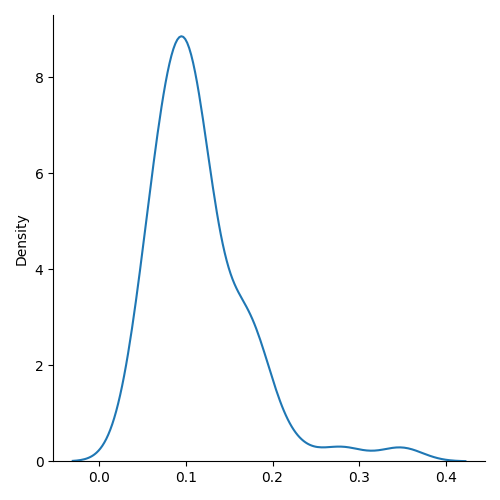

In [58]:
import seaborn as sns
sns.displot(parameter_dict['C_dist_durs'], kind="kde");